<a href="https://colab.research.google.com/github/tc11echo/data-structure-and-algorithm-in-python/blob/main/data_structure/heap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heap

Complete Binary Tree
* follow the order of arrangement of Full Binary Tree(a.k.a from top to bottom, from left to right)
* 按照Full Binary Tree的次序排列(由上至下，由左至右)

Types
* Min Heap
* Max Heap

Properties

* Height of $n$ node heap: $\lfloor log_2(n)\rfloor+1$ `(math.log(i,2)//2)+1`, in python

* Parent of node $i$: $\lfloor\frac{i-1}{2}\rfloor=$ `(i-1)//2`, in python

* Left child of node $i$: $2i+1$

* Right child of node $i$: $2i+2$

In all my heap I will use 0 as first node index

In [ ]:
# start with 0 (use in this note)
pos=2
print((pos-1)//2)
print(2*pos+1)
print(2*pos+2)

0
5
6


In [ ]:
# start with 1
pos=5
print(pos//2)
print(2*pos)
print(2*pos+1)

2
10
11


In [ ]:
# Min Heap

class MinHeap:
  def __init__(self, maxsize=10):
    self.maxsize=maxsize
    self.size=0
    self.heap=[0]*(self.maxsize)

  def get_parent(self, pos):
    return (pos-1)//2
  
  def get_left_child(self, pos):
    return 2*pos+1
  
  def get_right_child(self, pos):
    return (2*pos)+2
  
  def is_leaf(self, pos):
    if pos>=(self.size//2) and pos<=self.size:
      return True
    return False
  
  def swap(self, fpos, spos):
    self.heap[fpos],self.heap[spos]=self.heap[spos],self.heap[fpos]

  def insert(self, data):
    if self.size>=self.maxsize:
      return
    self.heap[self.size]=data
    cur=self.size
    self.size+=1
    while self.heap[cur]<self.heap[self.get_parent(cur)] and self.heap[self.get_parent(cur)]!=0:
      self.swap(cur,self.get_parent(cur))
      cur=self.get_parent(cur)
    
  def remove(self):
    if self.size==0:
      return
    popped=self.heap[0]
    self.heap[0]=self.heap[self.size-1]
    self.size-=1
    self.min_heapify(0)
    return popped

  def min_heapify(self, pos):
    if not self.is_leaf(pos):
      if self.heap[pos]>self.heap[self.get_left_child(pos)] or self.heap[pos]>self.heap[self.get_right_child(pos)]:
        if self.heap[self.get_left_child(pos)]<self.heap[self.get_right_child(pos)]:
          self.swap(pos,self.get_left_child(pos))
          self.min_heapify(self.get_left_child(pos))
        else:
          self.swap(pos, self.get_right_child(pos))
          self.min_heapify(self.get_right_child(pos))
  
  def display_all(self):
    for i in range(len(self.heap)):
      print(str(i)+":"+str(self.heap[i]),end="   ")
    print(self.size)
  
  #initialize element array to min heap
  def initialize(self,temp):
    self.size=len(temp)
    self.heap=temp.copy()
    self.heap.append(0)
    for i in range(0,self.size):
      self.min_heapify(self.get_parent(self.size-i-1))

h=MinHeap(10)
for i in [4,1,3,2,16,9,10,14,8,7]:
  h.insert(i)
h.display_all()
print(h.heap)
print()
for i in range(10):
  print(h.remove())
print()

h1=MinHeap(10)
s=[4,1,3,2,16,9,10,14,8,7] #10
print(s)
h1.initialize(s)
h1.display_all()
print(h1.heap)
for i in range(10):
  print(h1.remove())
print()

h2=MinHeap(10)
s1=[1,2,3,4,5,6,7,8,9,10,11,12,13] #13
print(len(s1))
h2.initialize(s1)
h2.display_all()
print(h2.heap)

0:1   1:2   2:3   3:4   4:7   5:9   6:10   7:14   8:8   9:16   10
[1, 2, 3, 4, 7, 9, 10, 14, 8, 16]

1
2
3
4
7
8
9
10
14
16

[4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
0:1   1:2   2:3   3:8   4:4   5:9   6:10   7:14   8:16   9:7   10:0   10
[1, 2, 3, 8, 4, 9, 10, 14, 16, 7, 0]
1
2
3
4
7
8
9
10
14
16

13
0:1   1:2   2:3   3:4   4:5   5:6   6:7   7:8   8:9   9:10   10:11   11:12   12:13   13:0   13
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0]


In [ ]:
# Max Heap

class MaxHeap:
  def __init__(self, maxsize=10):
    self.maxsize=maxsize
    self.size=0
    self.heap=[0]*(self.maxsize)

  def get_parent(self, pos):
    return (pos-1)//2
  
  def get_left_child(self, pos):
    return 2*pos+1
  
  def get_right_child(self, pos):
    return (2*pos)+2
  
  def is_leaf(self, pos):
    if pos>=(self.size//2) and pos<=self.size:
      return True
    return False
  
  def swap(self, fpos, spos):
    self.heap[fpos],self.heap[spos]=self.heap[spos],self.heap[fpos]

  def insert(self, data):
    if self.size>=self.maxsize:
      return
    self.heap[self.size]=data
    cur=self.size
    self.size+=1
    while self.heap[cur]>self.heap[self.get_parent(cur)] and self.heap[self.get_parent(cur)]!=0:
      self.swap(cur,self.get_parent(cur))
      cur=self.get_parent(cur)
    
  def remove(self):
    if self.size==0:
      return
    popped=self.heap[0]
    self.heap[0]=self.heap[self.size-1]
    self.size-=1
    self.max_heapify(0)
    return popped

  def max_heapify(self, pos):
    if not self.is_leaf(pos):
      if self.heap[pos]<self.heap[self.get_left_child(pos)] or self.heap[pos]<self.heap[self.get_right_child(pos)]:
        if self.heap[self.get_left_child(pos)]>self.heap[self.get_right_child(pos)]:
          self.swap(pos,self.get_left_child(pos))
          self.max_heapify(self.get_left_child(pos))
        else:
          self.swap(pos, self.get_right_child(pos))
          self.max_heapify(self.get_right_child(pos))
  
  def display_all(self):
    for i in range(len(self.heap)):
      print(str(i)+":"+str(self.heap[i]),end="   ")
    print(self.size)

  #initialize element array to max heap
  def initialize(self,temp):
    self.size=len(temp)
    self.heap=temp.copy()
    self.heap.append(0)
    for i in range(0,self.size-1):
      self.max_heapify(self.get_parent(self.size-i-1))

h=MaxHeap(10)
for i in [4,1,3,2,16,9,10,14,8,7]:
  h.insert(i)
h.display_all()
print(h.heap)
for i in range(10):
  print(h.remove())
print()

h1=MaxHeap(10)
s=[4,1,3,2,16,9,10,14,8,7] #10
print(len(s))
h1.initialize(s)
h1.display_all()
print(h1.heap)
for i in range(10):
  print(h1.remove())
print()

h2=MaxHeap(10)
s1=[1,2,3,4,5,6,7,8,9,10,11,12,13] #13
print(len(s1))
h2.initialize(s1)
h2.display_all()
print(h2.heap)

0:16   1:14   2:10   3:8   4:7   5:3   6:9   7:1   8:4   9:2   10
[16, 14, 10, 8, 7, 3, 9, 1, 4, 2]
16
14
10
9
8
7
4
3
2
1

10
0:16   1:14   2:10   3:8   4:7   5:9   6:3   7:2   8:4   9:1   10:0   10
[16, 14, 10, 8, 7, 9, 3, 2, 4, 1, 0]
16
14
10
9
8
7
4
3
2
1

13
0:13   1:11   2:12   3:9   4:10   5:6   6:7   7:8   8:4   9:2   10:5   11:3   12:1   13:0   13
[13, 11, 12, 9, 10, 6, 7, 8, 4, 2, 5, 3, 1, 0]


# Initialize Step

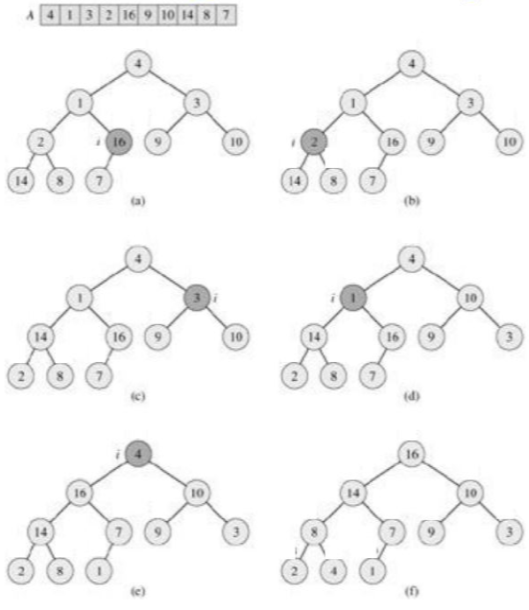